# CIFAR-10

__CIFAR-10__ (_Canadian Institute for Advanced Research 10_) ist ein bekannter Datensatz für das Trainieren und Testen von Bildklassifikationsalgorithmen. 

Der Datensatz wurde (wie __CIFAR-100__) von  _Alex Krizhevsky_, _Vinod Nair_ und _Geoffrey Hinton_ erstellt. Sie griffen dabei auf den wesentlich größeren Datensatz __80 Million Tiny Images__ zurück, der mittlerweile nicht mehr im Internet zur Verfügung steht.


### Hauptmerkmale des CIFAR-10 Datensatzes

* Anzahl der Bilder: 60.000
    * 50.000 Trainingsbilder
    * 10.000 Testbilder
* Bildgröße: 32×32 Pixel
* Farben: RGB (drei Farbkanäle)
* Anzahl der Klassen: 10


### Die Klassen

Der Datensatz enthält 60.000 Farbbilder mit einer Größe von 32×32 Pixeln, die zu jeweils 6.000 Bildern in 10 Klassen unterteilt sind:
```
classes = ['airplane','automobile','bird', 'cat','deer', 'dog', 'frog', 'horse','ship', 'truck']
```

### Einlesen (und ggf. einmaliger Download) des Datensatzes

Die Bibliothek `torchvision` stellt alle Funktionen zum Download des Datensatzes bereit. Die Daten werden als gzip-Datei (170 MB) heruntergladen und entpackt.

In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.CIFAR10(root='./data/',train=True,download=True,transform=ToTensor())
test_data = datasets.CIFAR10(root='./data/',train=False,download=True,transform=ToTensor())

classes = training_data.classes

print(f"Anzahl der Trainingsbilder: {len(training_data)}")
print(f"Anzahl der Testbilder: {len(test_data)}")

100%|██████████| 170M/170M [00:29<00:00, 5.79MB/s] 


Anzahl der Trainingsbilder: 50000
Anzahl der Testbilder: 10000


 Danach befinden sich im Datenverzeichnis `cifar-100-batches-py` fünf Batches mit je 10.000 Bildern zum Training (`data_batch_1` - `data_batch_5`) sowie eine weitere Datei zum Test (`text_batch`).

### Beispielbilder

In den Strukturen `training_data` und `test_data` befinden sich nun die Bilddaten und die dazugehörenden Labels.

#### Bildformat in PyTorch

`PyTorch` erwartet (farbige) Bilddaten als dreidimensionalen `Tensor`: Die drei Farbinformationen sind als drei übereinanderliegende Ebenen angeordnet. Normalerweise bestehen Bilddaten aus einem zweidiemnsionalen Array mit jeweils drei Farbwerten (RGB). Um zwischen diesen beiden Formaten zu wechseln, kann man die Methode `permute` verwenden, mit den die Dimensionen eines `Tensors` "vertauscht" werden.

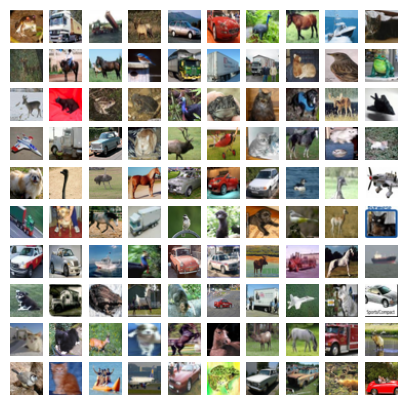

In [11]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(10, 10, figsize=(5,5))

for n, ax in enumerate(axs.flat):
    image, label = training_data[n]
    ax.imshow(image.permute(1,2,0))
    ax.axis('off')     

### Optional: Konvertierung der Daten in das YOLO-Format

In [8]:
import numpy as np
from PIL import Image
import pickle
import os

image_dir = f'{root}/cifar10/images'
label_dir = f'{root}/cifar10/labels'
os.makedirs(image_dir, exist_ok=True)
os.makedirs(label_dir, exist_ok=True) 

class_mapping = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


def convert_batch(batch):  
    with open(batch, 'rb') as f:
        dict = pickle.load(f, encoding='bytes')
    for label, data, filename in zip(dict[b'labels'],dict[b'data'],dict[b'filenames']):
        filename = filename.decode('UTF-8')

        pixels = 32 * 32
        with open(f'{image_dir}/{filename}','wb') as f:
            r, g, b = data[:pixels].reshape(32,32), data[pixels:2*pixels].reshape(32,32), data[2*pixels:].reshape(32,32)
            rgb = np.stack([r, g, b], axis=-1)
            image = Image.fromarray(rgb, 'RGB')
            image.save(f)
    
        with open(f'{label_dir}/{filename}'.replace('png','txt'),'w') as f:
            # Assuming the whole image is the object
            f.write(f"{label} 0.5 0.5 1.0 1.0\n") # Class index, x_center, y_center, width, height        

def convert_batches():    
    for n in range(1,6):
        print(f'Konvertiere Batch #{n}')
        convert_batch(f'data/cifar-10-batches-py/data_batch_{n}')

#convert_batches()        